<a href="https://colab.research.google.com/github/bernaldiaz/curso-numerico-3/blob/main/T13ProblemasFronteraEDOs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 13 - Problemas de Frontera para Ecuaciones Diferenciales Ordinarias

## Librerías y Funciones Necesarias

In [ ]:
import numpy as np
np.seterr(divide = "ignore", invalid = "ignore")
import pandas as pd
import math
from plotnine import *
pd.set_option('max_columns', None)

In [ ]:
def MetodoRungeKutta4Sistema(a, b, n, m, y0, f):
    """
    Ofrece una solución aproximada a un sistema de m ecuaciones 
    diferenciales 

    Args:
        a: (float) Valor inicial
        b: (float) Valor final
        n: (int) Número de aproximaciones
        m: (int) Número de ecuaciones
        y0: (ndarray) Array de condiciones iniciales y0_i
        f: (fun) Función f(t, y1,..., ym)

    Returns:
        yHat: (ndarray) Matriz de aproximaciones si complete = False
    """

    h = (b - a) / n
    yHat = np.zeros((m, n + 1))
    yHat[:, 0] = y0 # La primera columna de la matriz de aproximaciones vale la condición inicial
    t = np.zeros(n + 1) # Ponemos n + 1 porque también incluimos el índice 0
    t[0] = a

    k = np.zeros((m , 4))
    for i in range(1, n + 1):
        k[:, 0] = f(t[i - 1], yHat[:, i - 1])
        k[:, 1] = f(t[i - 1] + h / 2, yHat[:, i - 1] + (h * k[:, 0] / 2))
        k[:, 2] = f(t[i - 1] + h / 2, yHat[:, i - 1] + (h * k[:, 1] / 2))
        k[:, 3] = f(t[i - 1] + h, yHat[:, i - 1] + (h * k[:, 2]))
        
        yHat[:, i] = yHat[:, i - 1] + h / 6 * (k[:, 0] + 2 * k[:, 1] +
                                               2 * k[:, 2] + k[:, 3])

        t[i] = a + i * h 

    return yHat

In [ ]:
def HelperPlotTiro(t, y):
    """
    Dados los puntos t_i, muestra un gráfico donde se muestran y comparan las aproximaciones 
    yHat, yHat1 e yHat2
    
    Args:
        t: (ndarray) Array de los puntos t_i
        y: (tuple) Tupla de 3 ndarray Y, Y1 e Y2, correspondientes a las aproximaciones de
            yHat, yHat1 e yHat2 para los puntos t_i
    """ 

    df = pd.DataFrame({"t": t, "yHat": y[0], "yHat1": y[1], "yHat2": y[2]})
    dmod = pd.melt(df, id_vars = ["t"], value_vars = ["yHat", "yHat1", "yHat2"]) 
    p = ggplot(dmod, aes(x = "t", y = "value", color = "variable")) 
    (p + geom_line()
    + scale_color_manual(["blue", "red", "green"], name = "Funciones")
    + ylab("")
    + xlab("t")
    + xlim(df["t"].iloc[0] - 0.1, df["t"].iloc[-1] + 0.1) 
    + ggtitle("Comparación de las aproximaciones del Método del Tiro")
    ).draw();

## Método del Tiro

In [ ]:
def MetodoTiro(a, b, y0, n, p, q, r, verbose = False, complete = False):
    """
    Ofrece una solución aproximada a un sistema de m ecuaciones 
    diferenciales 

    Args:
        a: (float) Extremo izquierdo del intervalo [a, b]
        b: (float) Extremo derecho del intervalo [a, b]
        y0: (ndarray) Array de condiciones iniciales [y(a), y(b)]
        n: (int) Número de valores del mallado
        p: (fun) Función p(t)
        q: (fun) Función q(t)
        r: (fun) Función r(t)
        verbose: (bool) Para mostrar o no los resultados relevantes
        complete: (bool) Para devolver o no Y1 e Y2

    Returns:
        Y: (ndarray) Matriz de aproximaciones si complete = False
           (tuple) Tupla de 3 ndarray, (Y, Y1, Y2) si complete = True
        
    """

    h = (b - a) / n # Calculamos el paso

    def g1(t, y):
        return (y[1], p(t) * y[1] + q(t) * y[0] + r(t))

    Y1 = MetodoRungeKutta4Sistema(a, b, n, 2, np.array([y0[0], 0]), g1)

    if verbose:
        print("Y1 =\n", Y1.T)

    def g2(t, y):
        return (y[1], p(t) * y[1] + q(t) * y[0])

    Y2 = MetodoRungeKutta4Sistema(a, b, n, 2, np.array([0, 1]), g2)

    if verbose:
        print("Y2 =\n", Y2.T)

    Y = Y1[0, :] + (y0[1] - Y1[0, n]) / Y2[0, n] * Y2[0, :]

    if verbose:
        print("Y =\n", Y)

    if not complete:
        return Y
    return (Y, Y1, Y2)

In [ ]:
a = 0
b = 2
y0 = np.array([1, 4])
n = 20

def p(t):
    return t / 5

def q(t):
    return 2 * t + 1 / 10

def r(t):
    return -math.cos(t)

In [ ]:
Y = MetodoTiro(a, b, y0, n, p, q, r, verbose = True)

Y1 =
 [[ 1.          0.        ]
 [ 0.99583533 -0.07992337]
 [ 0.98469407 -0.13949129]
 [ 0.96862034 -0.17855989]
 [ 0.94966688 -0.19707532]
 [ 0.92989377 -0.19491817]
 [ 0.9113829  -0.17174459]
 [ 0.89626871 -0.12681889]
 [ 0.88678631 -0.05883014]
 [ 0.88533928  0.03431795]
 [ 0.89459035  0.15575797]
 [ 0.9175799   0.30996954]
 [ 0.95787971  0.50317491]
 [ 1.01979165  0.74385283]
 [ 1.10860567  1.04341541]
 [ 1.23093593  1.41710858]
 [ 1.39516152  1.88521799]
 [ 1.61200753  2.47469265]
 [ 1.89531557  3.22134003]
 [ 2.26307092  4.17280518]
 [ 2.73877857  5.3926279 ]]
Y2 =
 [[ 0.          1.        ]
 [ 0.10006668  1.00216817]
 [ 0.20066782  1.01136717]
 [ 0.302712    1.03173428]
 [ 0.40753189  1.06763848]
 [ 0.51691553  1.1238506 ]
 [ 0.6331572   1.20576749]
 [ 0.75913394  1.31970142]
 [ 0.8984148   1.47325107]
 [ 1.05541233  1.67577739]
 [ 1.23558816  1.93901698]
 [ 1.44572853  2.27787746]
 [ 1.69431104  2.71147617]
 [ 1.99199069  3.26450582]
 [ 2.35224352  3.9690409 ]
 [ 2.79221909  

In [ ]:
Y, Y1, Y2 = MetodoTiro(a, b, y0, n, p, q, r, verbose = False, complete = True)
Y1 = Y1[0] # Solamente queremos los valores para yHat1, descartamos yHat1'
Y2 = Y2[0] # Solamente queremos los valores para yHat2, descartamos yHat2'

t = np.array([a + (b - a) / n * i for i in range(0, n + 1)])

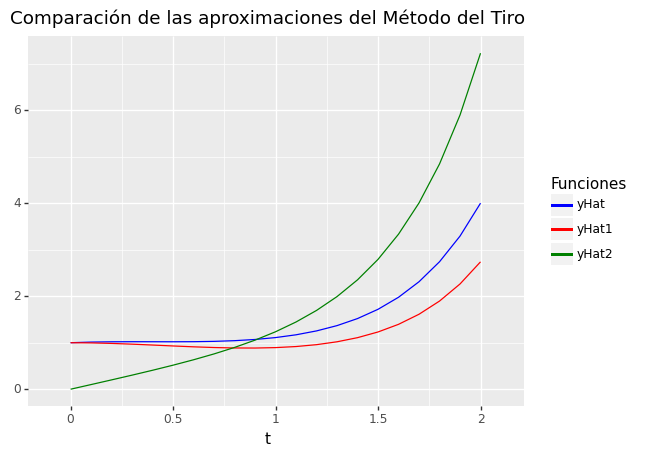

In [ ]:
HelperPlotTiro(t, (Y, Y1, Y2))

## Método de la Secante

In [ ]:
def MetodoSecante(a, b, y0, yPrima0, n, f, TOL, nMax, verbose = False):
    """
    Ofrece una solución aproximada a un sistema de m ecuaciones 
    diferenciales

    Args:
        a: (float) Extremo izquierdo del intervalo [a, b]
        b: (float) Extremo derecho del intervalo [a, b]
        y0: (ndarray) Array de condiciones iniciales [y(a), y(b)]
        yPrima0: (ndarray) Array de valores iniciales [y'00, y'01]
        n: (int) Número de valores del mallado
        f: (fun) Función f(t, y, y')
        TOL: (float) Tolerancia
        nMax: (int) Número máximo de iteraciones
        verbose: (bool) Para mostrar o no los resultados relevantes

    Returns:
        sol: (ndarray) Matriz de aproximaciones
        
    """

    def F(t, y):
        return (y[1], f(t, y[0], y[1]))

    def yFun(b, y, yPrima):
        return MetodoRungeKutta4Sistema(a, b, n, 2, np.array([y, yPrima]), F)

    h = (b - a) / n # Calculamos el paso

    k = 1 # Inicializamos el contador de iteraciones

    while (k <= nMax):
        yPrima = (yPrima0[1] - (yFun(b, y0[0], yPrima0[1]) - y0[1]) * (yPrima0[1] - yPrima0[0]) /
                  (yFun(b, y0[0], yPrima0[1]) - yFun(b, y0[0], yPrima0[0])))[0, -1]
        
        if verbose:
            print("\n\nIteración {}".format(k))
            print("y' =", yPrima)

        error = abs(yPrima - yPrima0[1])
        if verbose:
            print("error =", error)
        
        if error <= TOL:
            sol = MetodoRungeKutta4Sistema(a, b, n, 2, np.array([y0[0], yPrima]), F)
            
            if verbose:
                print("\n\nEl valor de la pendiente inicial vale {}".format(yPrima))
                print("La solución aproximada vale\n{}".format(sol.T))
            
            return sol

        yPrima0[0] = yPrima0[1]
        yPrima0[1] = yPrima
        k += 1

    if verbose:
        print("El método no converge")
    return

In [ ]:
a = 1
b = 2
y0 = np.array([1 / 2, 1 / 3])
yPrima0 = np.array([-0.5, 0.5])
n = 20

def f(t, y, yPrima):
    return math.pow(y, 3) - y * yPrima

TOL = 0.0000001
nMax = 10

In [ ]:
sol = MetodoSecante(a, b, y0, yPrima0, n, f, TOL, nMax, verbose = True)



Iteración 1
y' = -0.2429534327865185
error = 0.7429534327865185


Iteración 2
y' = -0.2501399642632074
error = 0.007186531476688907


Iteración 3
y' = -0.24999996188832213
error = 0.0001400023748852619


Iteración 4
y' = -0.25000001839129343
error = 5.650297130177506e-08


El valor de la pendiente inicial vale -0.25000001839129343
La solución aproximada vale
[[ 0.5        -0.25000002]
 [ 0.48780488 -0.23795362]
 [ 0.47619048 -0.22675739]
 [ 0.46511628 -0.21633317]
 [ 0.45454546 -0.20661159]
 [ 0.44444445 -0.19753088]
 [ 0.43478261 -0.18903593]
 [ 0.42553192 -0.18107743]
 [ 0.41666667 -0.17361113]
 [ 0.40816327 -0.16659726]
 [ 0.4        -0.16000001]
 [ 0.39215687 -0.15378702]
 [ 0.38461539 -0.14792901]
 [ 0.37735849 -0.14239944]
 [ 0.37037037 -0.13717422]
 [ 0.36363637 -0.13223142]
 [ 0.35714286 -0.12755103]
 [ 0.35087719 -0.12311482]
 [ 0.34482759 -0.11890608]
 [ 0.33898305 -0.11490952]
 [ 0.33333333 -0.11111112]]


## Método de Newton-Raphson

In [ ]:
def MetodoNewtonRaphson(a, b, y0, yPrima0, n, f, derivFY, derivFYPrima, 
                        TOL, nMax, verbose = False):
    """
    Ofrece una solución aproximada a un sistema de m ecuaciones 
    diferenciales 

    Args:
        a: (float) Extremo izquierdo del intervalo [a, b]
        b: (float) Extremo derecho del intervalo [a, b]
        y0: (ndarray) Array de condiciones iniciales [y(a), y(b)]
        yPrima0: (float) Valor inicial y'00
        n: (int) Número de valores del mallado
        f: (fun) Función f(t, y, y')
        derivFY: (fun) Parcial de f con respecto a y
        derivFYPrima: (fun) Parcial de f con respecto a y'
        TOL: (float) Tolerancia
        nMax: (int) Número máximo de iteraciones
        verbose: (bool) Para mostrar o no los resultados relevantes

    Returns:
        sol: (ndarray) Matriz de aproximaciones
        
    """

    def F(t, y):
        return (y[1], f(t, y[0], y[1]), 
                y[3], derivFY(t, y[0], y[1]) * y[2] + derivFYPrima(t, y[0], y[1]) * y[3])

    def yz(b, y, yPrima):
        return MetodoRungeKutta4Sistema(a, b, n, 4, np.array([y, yPrima, 0, 1]), F)

    h = (b - a) / n # Calculamos el paso

    k = 1 # Inicializamos el contador de iteraciones

    while (k <= nMax):

        yzValue = yz(b, y0[0], yPrima0)

        yPrima = yPrima0 - (yzValue[0, -1] - y0[1]) / yzValue[2, -1]
        
        if verbose:
            print("\n\nIteración {}".format(k))
            print("y' =", yPrima)

        error = abs(yPrima - yPrima0)
        if verbose:
            print("error =", error)
        
        if error <= TOL:
            sol = MetodoRungeKutta4Sistema(a, b, n, 4, np.array([y0[0], yPrima, 0, 1]), F)[:2]
            
            if verbose:
                print("\n\nEl valor de la pendiente inicial vale {}".format(yPrima))
                print("La solución aproximada vale\n{}".format(sol.T))
            
            return sol

        yPrima0 = yPrima
        k += 1

    if verbose:
        print("El método no converge")
    return

In [ ]:
a = 1
b = 2
y0 = np.array([1 / 2, 1 / 3])
yPrima0 = -0.5
n = 20

def f(t, y, yPrima):
    return math.pow(y, 3) - y * yPrima

def derivFY(t, y, yPrima):
    return 3 * math.pow(y, 2) - yPrima

def derivFYPrima(t, y, yPrima):
    return -y

TOL = 0.000001
nMax = 10

In [ ]:
sol = MetodoNewtonRaphson(a, b, y0, yPrima0, n, f, derivFY, derivFYPrima,
                          TOL, nMax, verbose = True)



Iteración 1
y' = -0.2550026371205174
error = 0.2449973628794826


Iteración 2
y' = -0.250001470915579
error = 0.005001166204938401


Iteración 3
y' = -0.2500000183918705
error = 1.4525237084783704e-06


Iteración 4
y' = -0.25000001839174896
error = 1.2156942119645464e-13


El valor de la pendiente inicial vale -0.25000001839174896
La solución aproximada vale
[[ 0.5        -0.25000002]
 [ 0.48780488 -0.23795362]
 [ 0.47619048 -0.22675739]
 [ 0.46511628 -0.21633317]
 [ 0.45454546 -0.20661159]
 [ 0.44444445 -0.19753088]
 [ 0.43478261 -0.18903593]
 [ 0.42553192 -0.18107743]
 [ 0.41666667 -0.17361113]
 [ 0.40816327 -0.16659726]
 [ 0.4        -0.16000001]
 [ 0.39215687 -0.15378702]
 [ 0.38461539 -0.14792901]
 [ 0.37735849 -0.14239944]
 [ 0.37037037 -0.13717422]
 [ 0.36363637 -0.13223142]
 [ 0.35714286 -0.12755103]
 [ 0.35087719 -0.12311482]
 [ 0.34482759 -0.11890608]
 [ 0.33898305 -0.11490952]
 [ 0.33333333 -0.11111112]]


## Problemas Lineales

In [ ]:
def ProblemasLineales(a, b, y0, n, p, q, r, verbose = False):
    """
    Ofrece una solución aproximada para un problema de valor frontera de orden 2

    Args:
        a: (float) Extremo izquierdo del intervalo [a, b]
        b: (float) Extremo derecho del intervalo [a, b]
        y0: (ndarray) Array de condiciones iniciales [y(a), y(b)]
        n: (int) Número de valores del mallado
        p: (fun) Función p(t)
        q: (fun) Función q(t)
        r: (fun) Función r(t)
        verbose: (bool) Para mostrar o no los resultados relevantes

    Returns:
        Y: (ndarray) Matriz de aproximaciones
        
    """

    h = (b - a) / n # Calculamos el paso

    A = np.zeros((n - 1, n - 1))
    b = np.zeros((n - 1, 1))

    for i in range(1, n - 2):
        t = a + (i + 1) * h
        A[i, i] = 2 + math.pow(h, 2) * q(t)
        A[i, i + 1] = -1 + h / 2 * p(t)
        A[i, i - 1] = -1 - h / 2 * p(t)
        b[i] = -math.pow(h, 2) * r(t)

    A[0, 0] = 2 + math.pow(h, 2) * q(a + h)
    A[n - 2, n - 2] = 2 + math.pow(h, 2) * q(a + (n - 1) * h)
    A[0, 1] = -1 + h / 2 * p(a + h)
    A[n - 2, n - 3] = -1 - h / 2 * p(a + (n - 1) * h)
    b[0] = -math.pow(h, 2) * r(a + h) + (1 + h / 2 * p(a + h)) * y0[0]
    b[n - 2] = -math.pow(h, 2) * r(a + (n - 1) * h) + (1 - h / 2 * p(a + (n - 1) * h)) * y0[1]

    if verbose:
        print("A =\n{}".format(A))
        print("b =\n{}".format(b))

    yHat = np.linalg.solve(A, b)

    if verbose:
        print("\nyHat =\n{}".format(yHat))

    return yHat

In [ ]:
a = 0
b = 2
y0 = np.array([1, 4])
n = 20

def p(t):
    return t / 5

def q(t):
    return 2 * t + 1 / 10

def r(t):
    return -math.cos(t)

In [ ]:
yHat = ProblemasLineales(a, b, y0, n, p, q, r, verbose = True)

A =
[[ 2.003 -0.999  0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [-1.002  2.005 -0.998  0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    -1.003  2.007 -0.997  0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    -1.004  2.009 -0.996  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.    -1.005  2.011 -0.995  0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -1.006  2.013 -0.994  0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.    -1.007  2.015 -0.993  0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.    -1.008 

## Problemas No Lineales

In [ ]:
def ProblemasNoLineales(a, b, y0, yHat0, n, f, derivFY, derivFYPrima, TOL, nMax, verbose = False):
    """
    Ofrece una solución aproximada a una ecuación de segundo orden de valores frontera

    Args:
        a: (float) Extremo izquierdo del intervalo [a, b]
        b: (float) Extremo derecho del intervalo [a, b]
        y0: (ndarray) Array de condiciones iniciales [y(a), y(b)]
        yHat0: (ndarray) Array de aproximaciones yHat
        n: (int) Número de valores del mallado
        f: (fun) Función f(t, y, y')
        derivFY: (fun) Parcial de f con respecto a y
        derivFYPrima: (fun) Parcial de f con respecto a y'
        TOL: (float) Tolerancia
        nMax: (int) Número máximo de iteraciones
        verbose: (bool) Para mostrar o no los resultados relevantes

    Returns:
        yHat0: (ndarray) Matriz de aproximaciones
        
    """

    h = (b - a) / n # Calculamos el paso

    k = 1 # Inicializamos el contador de iteraciones

    while k <= nMax:

        J = np.zeros((n - 1, n - 1))
        F = np.zeros((n - 1, 1))

        t = a + h
        x = (yHat0[1] - y0[0]) / (2 * h)
        F[0] = yHat0[1] - 2 * yHat0[0] - math.pow(h, 2) * f(t, yHat0[0], x) + y0[0]
        J[0, 0] = -2 - math.pow(h, 2) * derivFY(t, yHat0[0], x)
        J[0, 1] = 1 - h / 2 * derivFYPrima(t, yHat0[0], x)

        for i in range(1, n - 2):
            t = a + (i + 1) * h
            x = (yHat0[i + 1] - yHat0[i - 1]) / (2 * h)
            F[i] = yHat0[i + 1] - 2 * yHat0[i] + yHat0[i - 1] - math.pow(h, 2) * f(t, yHat0[i], x)
            J[i, i - 1] = 1 + h / 2 * derivFYPrima(t, yHat0[i], x)
            J[i, i] = -2 - math.pow(h, 2) * derivFY(t, yHat0[i], x)
            J[i, i + 1] = 1 - h / 2 * derivFYPrima(t, yHat0[i], x)

        t = a + (n - 1) * h
        x = (y0[1] - yHat0[n - 3]) / (2 * h)
        F[n - 2] = -2 * yHat0[n - 2] + yHat0[n - 3] - math.pow(h, 2) * f(t, yHat0[n - 2], x) + y0[1]
        J[n - 2, n - 2] = -2 - math.pow(h, 2) * derivFY(t, yHat0[n - 2], x)
        J[n - 2, n - 3] = 1 + h / 2 * derivFYPrima(t, yHat0[n - 2], x)

        if verbose:
            print("\n\nIteración {}".format(k))
            print("J =\n{}".format(J))
            print("F =\n{}".format(F))

        v = np.linalg.solve(J, -F)
        error = np.linalg.norm(v)
        if verbose:
            print("v =\n{}".format(v))
            print("error =", error)

        if error <= TOL:
            if verbose:
                print("\n\nSolución aproximada yHat =\n{}".format(yHat0))
            return yHat0

        yHat0 += v
        print("yHat =\n{}".format(yHat0))
        k += 1

    if verbose:
        print("El método no converge")
    return

In [ ]:
a = 1
b = 2
y0 = np.array([1 / 2, 1 / 3])
n = 20
yHat0 = np.zeros((n - 1, 1))

def f(t, y, yPrima):
    return math.pow(y, 3) - y * yPrima

def derivFY(t, y, yPrima):
    return 3 * math.pow(y, 2) - yPrima

def derivFYPrima(t, y, yPrima):
    return -y

TOL = 0.000001
nMax = 50

In [ ]:
yHat = ProblemasNoLineales(a, b, y0, yHat0, n, f, derivFY, derivFYPrima, TOL, nMax, verbose = True)



Iteración 1
J =
[[-2.0125      1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 1.         -2.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          1.         -2.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          1.         -2.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          1.         -2.          1.
   0.          0.          0.          0.          0.          0